In [29]:
import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *

# models
from sklearn.linear_model import LinearRegression, LogisticRegression # Linear Regression Model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor # KNN

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score

# model validation methods
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

# Supervised ML Workflow

1. Load Data
2. Clean and Preprocess Data
3. Create Empty Model
4. Fit Model
5. Make Predictions and Assess Model Performance

Let's try two models, one classification model (Decision Tree) and one regression model (KNN Regression).

## Decision Tree Classifier

In [30]:
# Decision Tree Classifier

## 1. Load Data
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Lizzo_data.csv")
df.head()

,Unnamed: 0,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,...,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
0,1,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.566,0.660,...,Cuz I Love You,https://p.scdn.co/mp3-preview/04472d81bc5a9669...,1,track,spotify:track:6YdQgWSpsxhVeX6Xmv3IFJ,https://open.spotify.com/track/6YdQgWSpsxhVeX6...,Cuz I Love You,C#,major,C# major
1,2,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.694,0.807,...,Like a Girl,https://p.scdn.co/mp3-preview/4f917112d7f75e2c...,2,track,spotify:track:5I7sGubUsKo4mVJpBoSVUr,https://open.spotify.com/track/5I7sGubUsKo4mVJ...,Cuz I Love You,D,major,D major
2,3,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.767,0.889,...,Juice,https://p.scdn.co/mp3-preview/7ca1598cec36c491...,3,track,spotify:track:0k664IuFwVP557Gnx7RhIl,https://open.spotify.com/track/0k664IuFwVP557G...,Cuz I Love You,G,major,G major
3,4,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.693,0.849,...,Soulmate,https://p.scdn.co/mp3-preview/467bc6a734bfb66e...,4,track,spotify:track:6h2wpo2pshM8QnAvRySEO0,https://open.spotify.com/track/6h2wpo2pshM8QnA...,Cuz I Love You,G,major,G major
4,5,Lizzo,56oDRnqbIiwx4mymNEv7dS,6dFFcYQ8VhifgdKgYY5LYL,album,2019-04-19,2019,day,0.674,0.542,...,Jerome,https://p.scdn.co/mp3-preview/8f662de51ad3f613...,5,track,spotify:track:3kxsEF30mM0TZWfkOv4XsS,https://open.spotify.com/track/3kxsEF30mM0TZWf...,Cuz I Love You,G#,major,G# major


In [31]:
## 2. Clean and Preprocess Data


# set X and y
predictors = ["key", "loudness", "speechiness", "acousticness",
              "instrumentalness", "liveness", "valence", "duration_ms", "album_name"]
X = df[predictors]
y = df["mode_name"]

# dummy
X = pd.get_dummies(X, columns = ["album_name"])

# model validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# scaling
z = StandardScaler()
continuous = ["key", "loudness", "speechiness", "acousticness",
              "instrumentalness", "liveness", "valence", "duration_ms"]

X_train[continuous] = z.fit_transform(X_train[continuous])
X_test[continuous] = z.transform(X_test[continuous])


In [32]:
# 3. create empty model
dt = DecisionTreeClassifier()

# 4. fit model
dt.fit(X_train, y_train)

# 5. make predictions
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_pred_train_p = dt.predict_proba(X_train)[:, 1]
y_pred_test_p = dt.predict_proba(X_test)[:, 1]

# 5. assess model
print("Train Acc:", accuracy_score(y_train, y_pred_train))
print("Test Acc :", accuracy_score(y_test, y_pred_test))
print("Train ROC AUC:", roc_auc_score(y_train, y_pred_train_p))
print("Test ROC AUC :", roc_auc_score(y_test, y_pred_test_p))

Train Acc: 1.0
Test Acc : 0.8
Train ROC AUC: 1.0
Test ROC AUC : 0.7916666666666667


## KNN Regression

Now let's build a linear regression predicting `energy` using the predictors listed in `predictors` and the new pop_divas dataset.



In [33]:
## 1. Load Data
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/PopDivas_data.csv")
df.head()


,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


In [34]:
## 2. Clean and Preprocess Data

# set X and y
predictors = ["key", "loudness", "speechiness", "acousticness",
              "instrumentalness", "liveness", "valence", "duration_ms", "artist_name"]
X = ??
y = ??

# dummy


# model validation


# scaling



SyntaxError: invalid syntax (3882650602.py, line 6)

In [ ]:
# 3. create empty model


# 4. fit model


# 5. make predictions


# 5. assess model

# use MSE, R2

## On Your Own (Linear Regression)

Now that you've seen one and we've done one together, take a minute to build a linear regression model predicting `body_mass_g` using the variables listed in `predictors` from the Palmer Penguins dataset.

In [ ]:
## 1. Load Data
url = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv"


In [ ]:
## 2. Clean and Preprocess Data

# set X and y
predictors = ["species", "island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "sex"]
X = ??
y = ??

# dummy


# model validation


# scaling



In [ ]:
# 3. create empty model


# 4. fit model


# 5. make predictions


# 5. assess model

# use MSE, R2

In [35]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, silhouette_samples

# Unsupervised ML Workflow

1. Load Data
2. Clean and Preprocess Dat
3. Create Model
4. Fit Model
5. Assess Model

Now let's build a KMeans model together using the penguin data to cluster penguins based on their `bill_length_mm`, `bill_depth_mm`, and `flipper_length_mm`.

In [36]:
# 1. Load Data
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv")
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [64]:
# 2. Clean and Preprocess Data
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm']

X = df[features]

# drop missing data
X.dropna(inplace=True)

# scaling
z = StandardScaler()

X[features] = z.fit_transform(X)


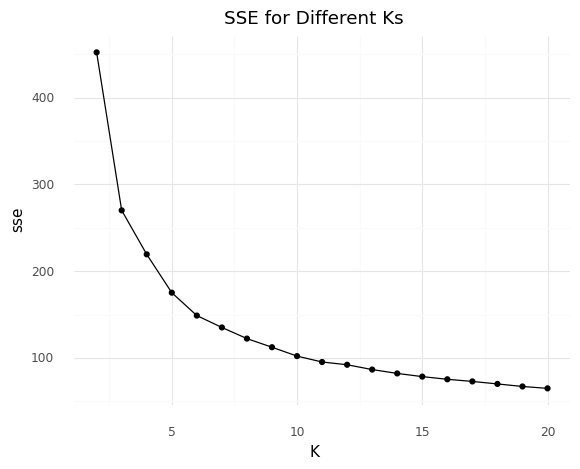

<ggplot: (8771108331996)>

In [65]:
# 3. Create Model, 4. Fit Model, 5. Assess Model
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sse =  []
sil = []

for k in ks:
  km = KMeans(n_clusters = k)
  km.fit(X)

  sse.append(km.inertia_)
  sil.append(silhouette_score(X, km.predict(X)))

sse_df = pd.DataFrame({"K": ks,
                       "sse": sse,
                       "silhouette": sil})

(ggplot(sse_df, aes(x = "K", y = "sse")) + 
 geom_line() + geom_point() +
 theme_minimal() + 
 labs(title = "SSE for Different Ks"))

In [66]:
# 3. Create Model
km = KMeans(n_clusters=  5)

# 4. Fit Model
km.fit(X[features])

# 5. Assess Model
silhouette_score(X[features], km.predict(X))

0.36967464756818447

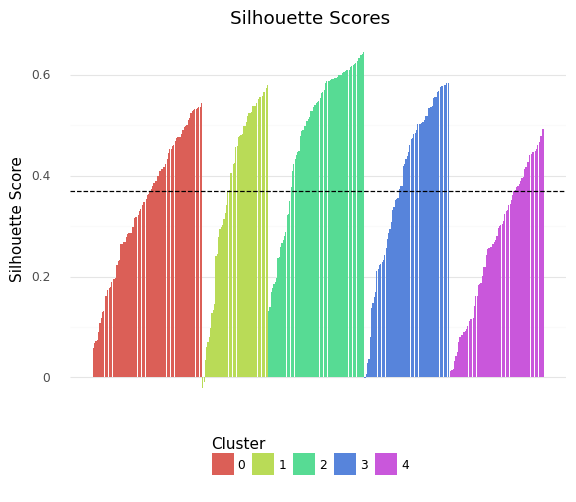

<ggplot: (8771089156798)>

In [67]:
# sil_points
sil_points = silhouette_samples(X, km.predict(X))


# add silhouette scores and clusters to X
X["sil"] = sil_points
X["cluster"] =km.predict(X[features])

# sort X by cluster and silhouette score just to look better
X = X.sort_values(by = ["cluster", "sil"], ascending = True)

# number rows for graphing
X["number"] = range(0,X.shape[0])

(ggplot(X, aes(x = "number", y = "sil", fill = "factor(cluster)"))
+ geom_bar(stat = "identity") + 
 geom_hline(yintercept = np.mean(sil_points), linetype = "dashed") +
theme_minimal() + 
labs(x = "", y = "Silhouette Score", title = "Silhouette Scores") + 
theme(axis_text_x= element_blank(),
panel_grid_major_x= element_blank(),
panel_grid_minor_x= element_blank(),
legend_position= "bottom") +
scale_fill_discrete(name = "Cluster"))

## Your Turn (GMM)

Now that you've seen the Unsupervised ML Workflow, build a Gaussian Mixture Model to cluster the iris data using `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`. 

Choose the number of clusters by looping through a reasonable range of values and choosing one using the elbow method. 

In [ ]:
# 1. Load Data
url = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/iris.csv"


In [ ]:
# 2. Clean and Preprocess Data


# drop missing data


# scaling


In [ ]:
# Loop to choose number of clusters

In [ ]:
# 3. Create Model


# 4. Fit Model


# 5. Assess Model


# Gradient Descent Code

From the Lecture

In [1]:
import pandas as pd
import numpy as np
# create data frame from (1,1), (2,3)
df = pd.DataFrame({"x": [1,2], "y": [1,3]})
df

,x,y
0,1,1
1,2,3


In [2]:
def stepGradient(b0_current, b1_current, points, learningRate):
    # initialize gradient to 0
    b0_gradient = 0
    b1_gradient = 0

    # for each data point, calculate gradient and add 
    for i in range(0, len(points)):
        b0_gradient += -2 * (points.iloc[i].y - ((b1_current*points.iloc[i].x) + b0_current))
        b1_gradient += -2 * points.iloc[i].x * (points.iloc[i].y - ((b1_current * points.iloc[i].x) + b0_current))

    # update parameter values
    new_b0 = b0_current - (learningRate * b0_gradient)
    new_b1 = b1_current - (learningRate * b1_gradient)
    return [np.round(new_b0,5), np.round(new_b1,5)]

print("Our new parameter values are: ", stepGradient(0,0, df, 0.01))
#based on https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

Our new parameter values are:  [0.08, 0.14]


In [3]:
print("Our new parameter values are: ", stepGradient(0.08,0.14, df, 0.01))

Our new parameter values are:  [0.1484, 0.2612]


In [4]:
# create data frame 
x = np.random.normal(loc = 0, scale = 1, size = 100)
y = 1.67 + 0.67*x + np.random.normal(loc = 0, scale = 0.2, size = 100)
df2 = pd.DataFrame({"x": x, "y": y})
df2

,x,y
0,0.141106,1.900990
1,-0.224606,1.573653
2,1.863365,2.841561
3,-0.247796,1.511752
4,1.085880,2.717949
...,...,...
95,-1.841288,0.343966
96,0.266867,1.803498
97,0.024258,1.545968
98,0.440585,2.141564


In [5]:
print("Our new parameter values are: ", stepGradient(0,0, df2, 0.01))

Our new parameter values are:  [3.53551, 1.96813]
